# PROJECT 8 - RESTAURANT FOOD COST PREDICTION
# NAME - SUBHAM
# BATCH - DS2401

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [84]:
df=pd.read_excel('Data_Train.xlsx')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [3]:
df.shape

(12690, 9)

In [ ]:
# there are 12690 rows and 9 columns present in the dataset

In [4]:
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [ ]:
# there are only 2 datatypes of int64 and others columns datatypes are object/string

In [5]:
df.isnull().sum()

TITLE            1003
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [ ]:
# some columns have null values
# remove null values , for numeric data replace null value with mean and for object data replace null value with mode

In [6]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

TITLE
QUICK BITES               4218
CASUAL DINING             3652
CAFÉ                       607
DESSERT PARLOR             382
CASUAL DINING,BAR          349
                          ... 
BAKERY,FOOD COURT            1
CLUB,MICROBREWERY            1
QUICK BITES,FOOD TRUCK       1
BAKERY,BEVERAGE SHOP         1
BAR,MICROBREWERY             1
Name: count, Length: 112, dtype: int64


RESTAURANT_ID
7264     8
4634     7
9910     6
11971    5
12747    5
        ..
9069     1
6573     1
7430     1
6381     1
6134     1
Name: count, Length: 11892, dtype: int64


CUISINES
South Indian                                  532
North Indian                                  526
North Indian, Chinese                         501
Fast Food                                     286
Chinese                                       167
                                             ... 
Italian, Biryani, Fast Food                     1
Desserts, Juices, Fast Food                     1
Asian, Continental, Europ

In [ ]:
# this give unique values and value counts of data
# for title column there are 112 unique values and unique value quick bites have 4218 value count
# ouick bite value is also mode of title column
# so we replace null values with quick bites in the title column. same with the other columns

In [88]:
df['TITLE'].fillna('QUICK BITES',inplace=True) 

In [89]:
df['CITY'].fillna('Chennai',inplace=True) 

In [90]:
df['VOTES'].fillna('44 votes',inplace=True) 

In [91]:
df['LOCALITY'].fillna('Gachibowli',inplace=True) 

In [92]:
df['RATING'].fillna('3.9',inplace=True) 

In [93]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12690 non-null  object
 5   LOCALITY       12690 non-null  object
 6   RATING         12690 non-null  object
 7   VOTES          12690 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [ ]:
# there are 12690 rows and 9 columns
# no null values are present
# datatype is also given here

# DESCRIPTION OF DATASET

In [14]:
df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [94]:
#changing string to numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,739,320,285,17,1278,1200
1,33,13198,289,1885,67,1046,23,950,1500
2,31,10915,2976,661,67,1101,19,712,800
3,94,6346,4130,275,222,136,22,787,800
4,50,15387,1766,615,222,620,19,470,300
...,...,...,...,...,...,...,...,...,...
12685,94,13228,2934,1144,131,342,19,1349,500
12686,33,9686,2143,1177,222,133,24,191,1800
12687,71,11133,2088,1137,239,1342,21,1428,1300
12688,31,6134,3506,1837,67,631,16,996,400


In [44]:
df.describe()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,59.660757,7759.134121,2235.193932,1180.084003,142.281403,652.391568,18.795902,991.443578,655.252246
std,32.898536,4504.874150,1204.091664,754.459944,83.921428,399.116379,6.181352,482.531198,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,31.000000,3863.250000,1185.250000,555.000000,67.000000,337.000000,16.000000,619.000000,300.000000
50%,59.000000,7740.000000,2416.500000,1123.000000,131.000000,582.000000,19.000000,1100.000000,500.000000
75%,94.000000,11688.750000,3222.750000,1847.000000,222.000000,1009.000000,22.000000,1341.000000,800.000000
max,111.000000,15573.000000,4154.000000,2688.000000,358.000000,1415.000000,31.000000,1846.000000,14000.000000


In [ ]:
# 1)count for all columns is 12690 meaning their is no null value present in the data
# 2)skewness present in the dataset (if the mean is greater than median then it is called right skewed and if the mean is less 
#   than median it is called left skewed)
#   right skewed:- RESTAURANT_ID , TIME , CITY , LOCALITY
#   left skewed:- TITLE , CUISINES , RATING , VOTES(highly) 
# 3)outliers are present if there is jump in values between  75% and max
#   it may be present in CITY , RATING , VOTES etc

<Axes: >

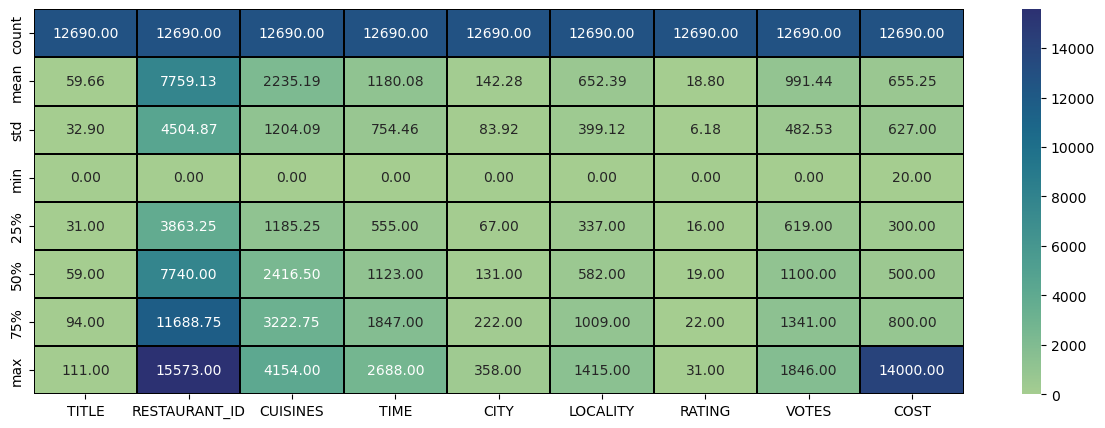

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df.describe(),annot=True ,fmt='0.2f' ,linewidth=0.2,linecolor='black',cmap='crest' )

In [ ]:
# same statistical summary can also be seen through heatmap

# CHECKING SKEWNESS

In [19]:
A=df.columns
A

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

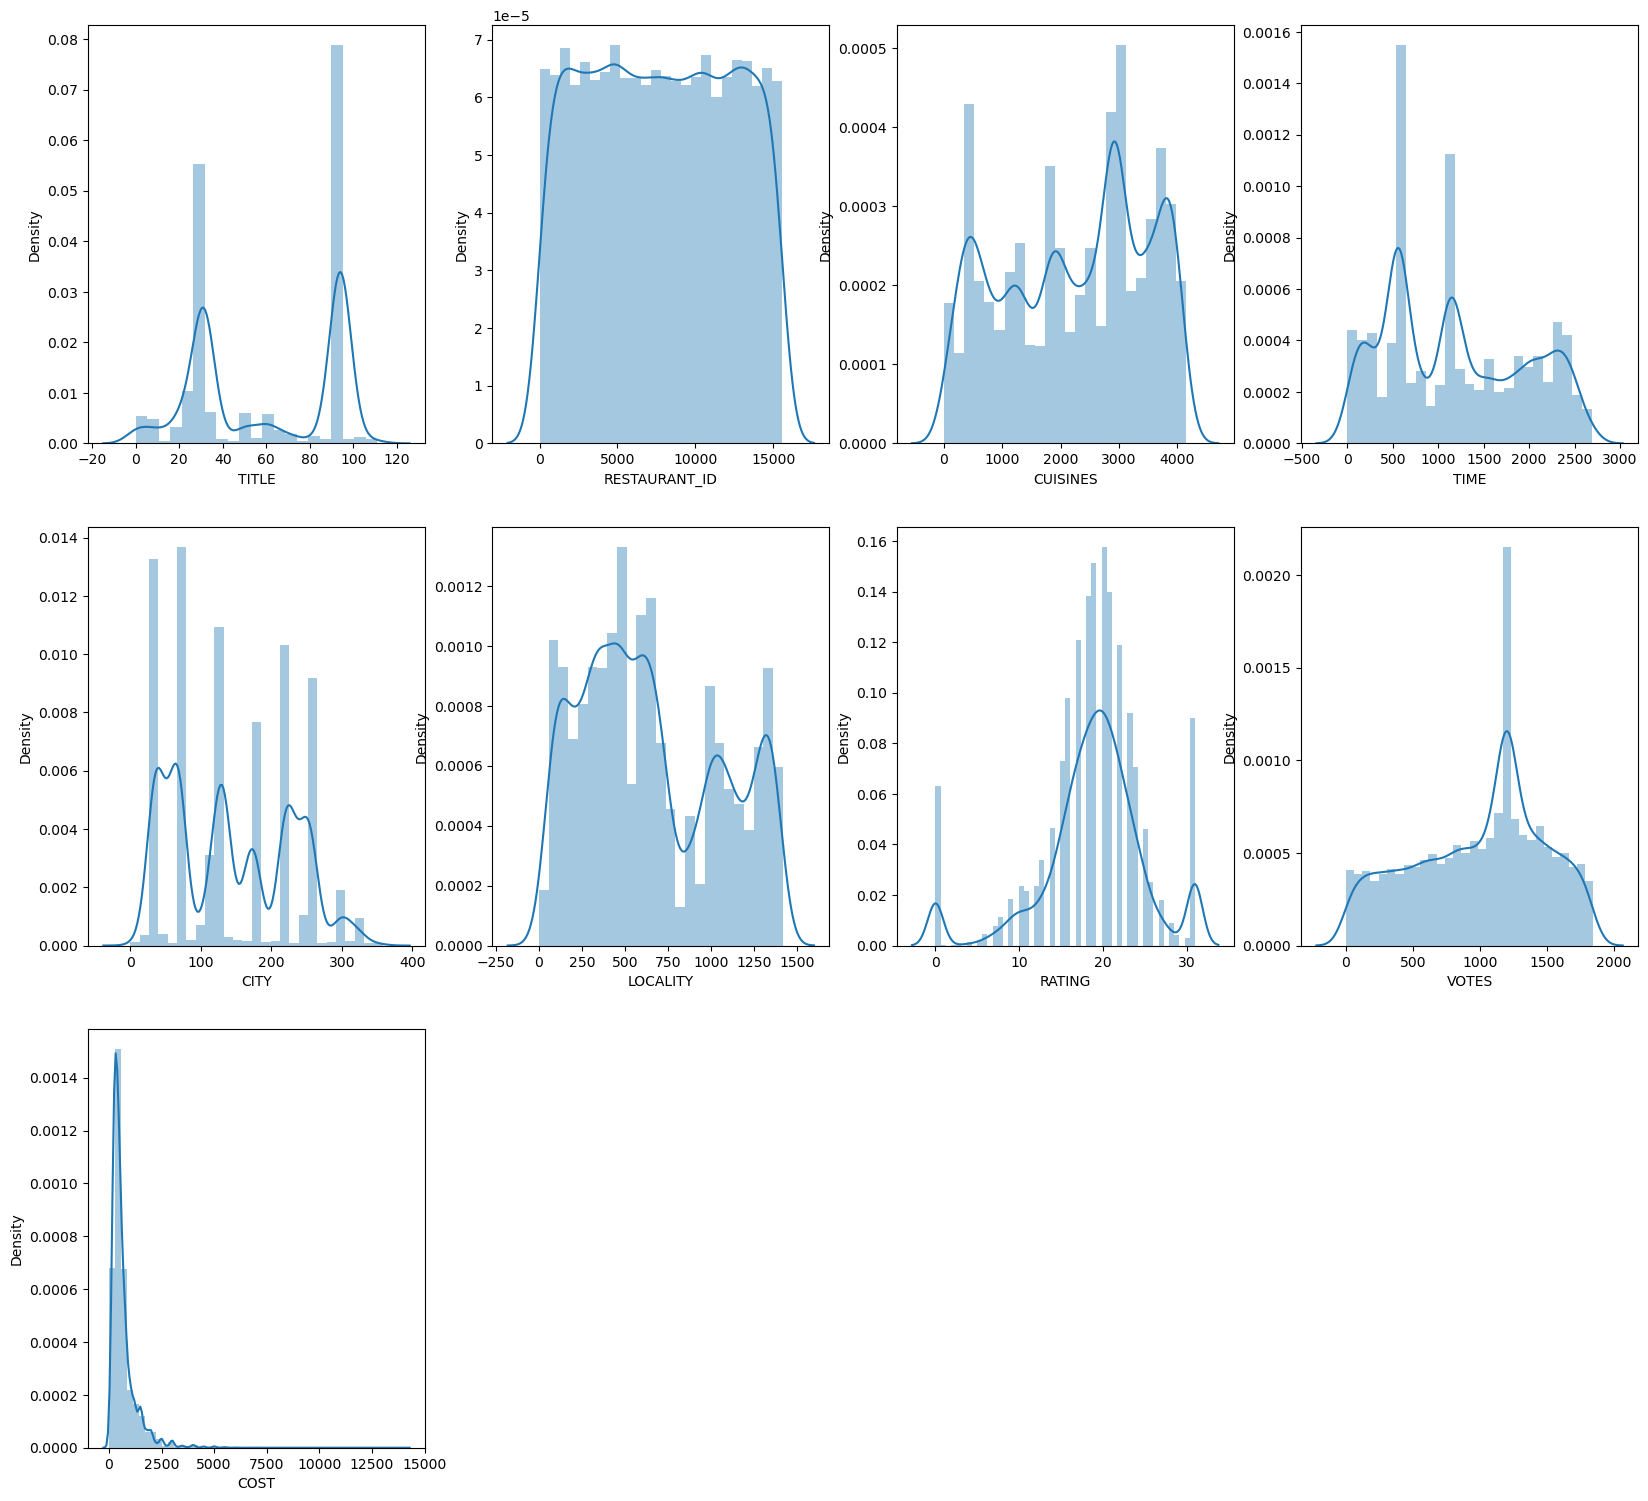

In [20]:
#for checking skewness of multiple columns at the same time
plt.figure(figsize=(20,25))
p=1
for i in A:
    if p<=9:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1


In [ ]:
# we can see that the some columns are skewed
# right skewed:- TIME , CITY , LOCALITY
# left skewed:- CUISINES , RATING , VOTES(highly)

In [45]:
#we can check numerical value of skewness too
# acceptable range of skewness is +0.5 to -0.5
df.skew()

TITLE           -0.079665
RESTAURANT_ID    0.006947
CUISINES        -0.218782
TIME             0.306186
CITY             0.266332
LOCALITY         0.352317
RATING          -0.803390
VOTES           -0.316806
COST             3.978801
dtype: float64

In [ ]:
# +ve values are right skewed and -ve values are left skewed but acceptable range is +0.5 to -0.5
# so we only have to fix ratings column

In [34]:
#removing skewness using cuberoot method
df['RATING']=np.cbrt(df['RATING'])


In [35]:
df.skew()

TITLE           -0.079665
RESTAURANT_ID    0.006947
CUISINES        -0.218782
TIME             0.306186
CITY             0.266332
LOCALITY         0.352317
RATING          -3.537363
VOTES           -0.316806
COST             3.978801
dtype: float64

In [ ]:
# cuberoot and other methods are causing skewness to increase of rating column so i'm only using cuberoot method on cost column

In [46]:
df['COST']=np.cbrt(df['COST'])

In [47]:
df.skew()

TITLE           -0.079665
RESTAURANT_ID    0.006947
CUISINES        -0.218782
TIME             0.306186
CITY             0.266332
LOCALITY         0.352317
RATING          -0.803390
VOTES           -0.316806
COST             1.172684
dtype: float64

In [ ]:
# though it's better to not remove skewness from the label data

# CHECKING FOR OUTLIERS

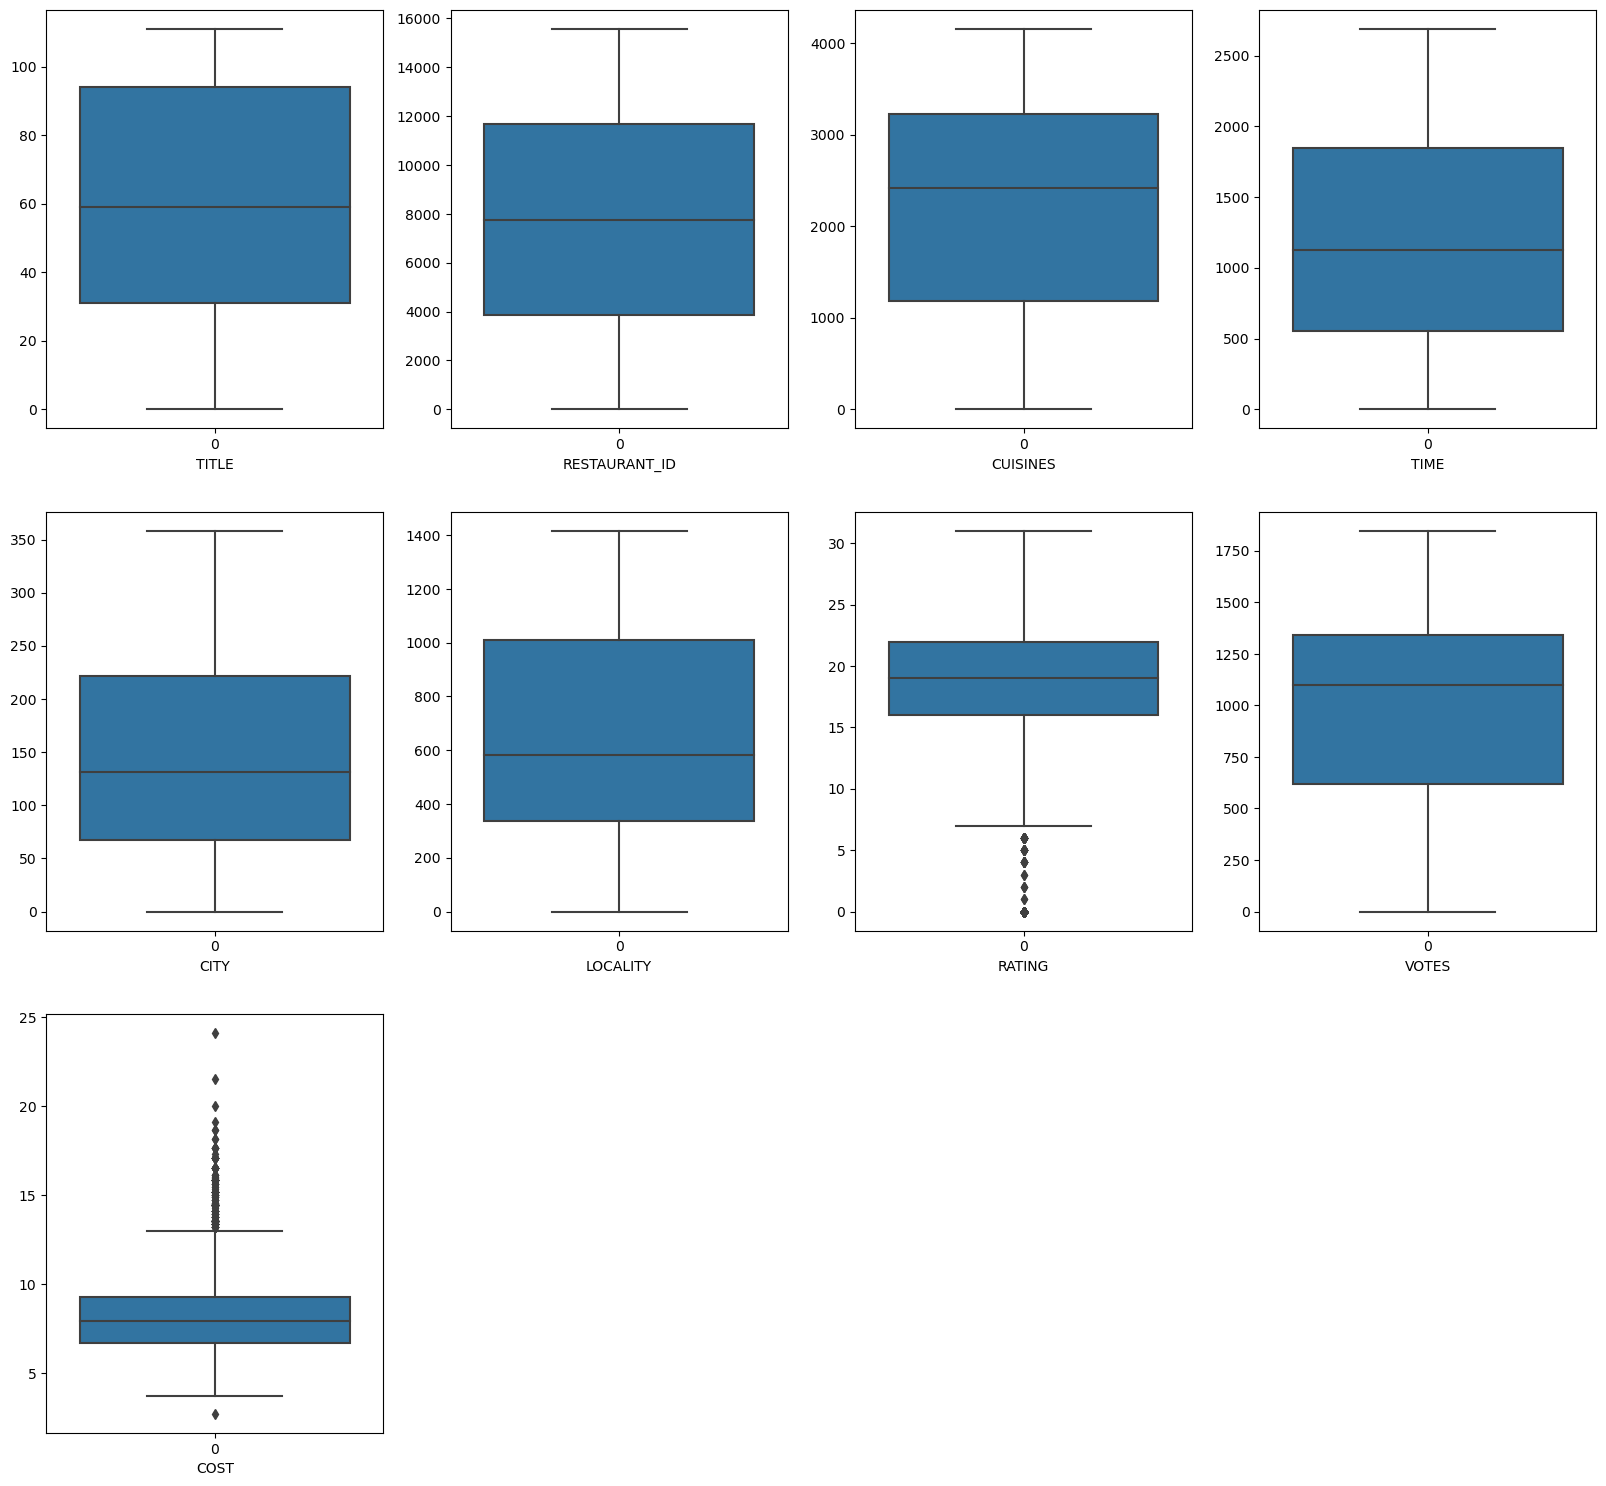

In [49]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in A:
    if p<=12:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


In [ ]:
# we can see from the boxplots that outliers are present in ratings and cost column

In [50]:
#removing outliers
from scipy.stats import zscore
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [51]:
c=df[['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST']]
z=np.abs(zscore(c))
z

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,0.871221,0.372692,0.325408,0.584658,2.117762,0.920549,0.290547,0.593884,1.194425
1,0.810425,1.207377,1.616381,0.934369,0.897082,0.986239,0.680153,0.085891,1.587859
2,0.871221,0.700572,0.615265,0.688048,0.897082,1.124048,0.033020,0.579143,0.550299
3,1.043834,0.313702,1.573701,1.199692,0.949957,1.293888,0.518369,0.423707,0.550299
4,0.293665,1.693314,0.389682,0.749021,0.949957,0.081161,0.033020,1.080685,0.690980
...,...,...,...,...,...,...,...,...,...
12685,1.043834,1.214036,0.580382,0.047829,0.134433,0.777728,0.033020,0.741031,0.095152
12686,0.810425,0.427746,0.076570,0.004088,0.949957,1.301405,0.841936,1.658909,1.931765
12687,0.344687,0.748966,0.122250,0.057108,1.152535,1.727906,0.356586,0.904757,1.332198
12688,0.871221,0.360764,1.055448,0.870745,0.897082,0.053599,0.452330,0.009443,0.367944


In [ ]:
# above table shows z score of all columns 
# z score less than 3 contains 99.7% data

In [52]:
#threshold=3
np.where(z>3)
#z score greater than 3 meaning outliers
# these values represent outliers
# 1st array tells rows and 2nd array shows column of the outliers 

(array([   13,    84,    85,   156,   178,   208,   235,   253,   308,
          329,   337,   369,   374,   379,   392,   396,   422,   428,
          438,   452,   453,   455,   469,   473,   480,   508,   563,
          577,   604,   615,   625,   644,   690,   731,   749,   751,
          772,   787,   831,   838,   839,   874,   911,   919,   949,
          966,   967,   973,   981,   993,   994,  1009,  1054,  1126,
         1133,  1193,  1196,  1205,  1227,  1287,  1297,  1345,  1365,
         1366,  1395,  1468,  1470,  1472,  1475,  1502,  1543,  1555,
         1581,  1594,  1596,  1597,  1632,  1635,  1657,  1696,  1701,
         1711,  1748,  1759,  1764,  1792,  1806,  1828,  1839,  1855,
         1878,  1884,  1884,  1903,  1916,  1930,  1931,  1983,  2025,
         2039,  2053,  2082,  2092,  2096,  2100,  2109,  2111,  2115,
         2124,  2207,  2251,  2254,  2313,  2327,  2333,  2339,  2349,
         2369,  2407,  2434,  2439,  2459,  2479,  2488,  2495,  2500,
      

In [53]:
df1=z[(z<3).all(axis=1)]
df1
# we will select/choose only that data having z score less than 3 thus removing outlier values

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,0.871221,0.372692,0.325408,0.584658,2.117762,0.920549,0.290547,0.593884,1.194425
1,0.810425,1.207377,1.616381,0.934369,0.897082,0.986239,0.680153,0.085891,1.587859
2,0.871221,0.700572,0.615265,0.688048,0.897082,1.124048,0.033020,0.579143,0.550299
3,1.043834,0.313702,1.573701,1.199692,0.949957,1.293888,0.518369,0.423707,0.550299
4,0.293665,1.693314,0.389682,0.749021,0.949957,0.081161,0.033020,1.080685,0.690980
...,...,...,...,...,...,...,...,...,...
12685,1.043834,1.214036,0.580382,0.047829,0.134433,0.777728,0.033020,0.741031,0.095152
12686,0.810425,0.427746,0.076570,0.004088,0.949957,1.301405,0.841936,1.658909,1.931765
12687,0.344687,0.748966,0.122250,0.057108,1.152535,1.727906,0.356586,0.904757,1.332198
12688,0.871221,0.360764,1.055448,0.870745,0.897082,0.053599,0.452330,0.009443,0.367944


In [54]:
df.shape
#old dataset rows are 12690

(12690, 9)

In [55]:
df1.shape
#new dataset rows are 11998
#692 rows were removed having ouliers

(11998, 9)

In [56]:
#this is percentage loss of data. max data that we can afford to lose is 10%
# since our value is 5.45% we lose 5.45% data which is within 10% range
#we cannot lose too much data as some data might be essential for model building
(df.shape[0]-df1.shape[0])/(df.shape[0])*100

5.45311268715524

# CHECK FOR CORRELATION AND MULTICOLLINEARITY

In [57]:
df1.corr()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.014552,0.237349,0.166462,0.013346,0.001389,-0.002519,-0.011417,-0.179511
RESTAURANT_ID,0.014552,1.000000,0.052504,-0.025841,-0.009007,-0.001373,0.010919,0.027534,0.018821
CUISINES,0.237349,0.052504,1.000000,0.065831,-0.025781,0.017245,-0.001912,0.002539,-0.081857
TIME,0.166462,-0.025841,0.065831,1.000000,0.017555,-0.010902,-0.028686,-0.004464,-0.102529
CITY,0.013346,-0.009007,-0.025781,0.017555,1.000000,0.109920,-0.049643,-0.028664,0.011570
LOCALITY,0.001389,-0.001373,0.017245,-0.010902,0.109920,1.000000,-0.000188,-0.009270,0.008442
RATING,-0.002519,0.010919,-0.001912,-0.028686,-0.049643,-0.000188,1.000000,-0.096107,0.055541
VOTES,-0.011417,0.027534,0.002539,-0.004464,-0.028664,-0.009270,-0.096107,1.000000,0.019058
COST,-0.179511,0.018821,-0.081857,-0.102529,0.011570,0.008442,0.055541,0.019058,1.000000


In [ ]:
# we can see correlation between different columns with this
# 1 and -1 means the 2 columns are highly related. target variable is obviously mostly related to each other and if other 
# columns are highly related then it means multicollinearity is present in the data
#

<Axes: >

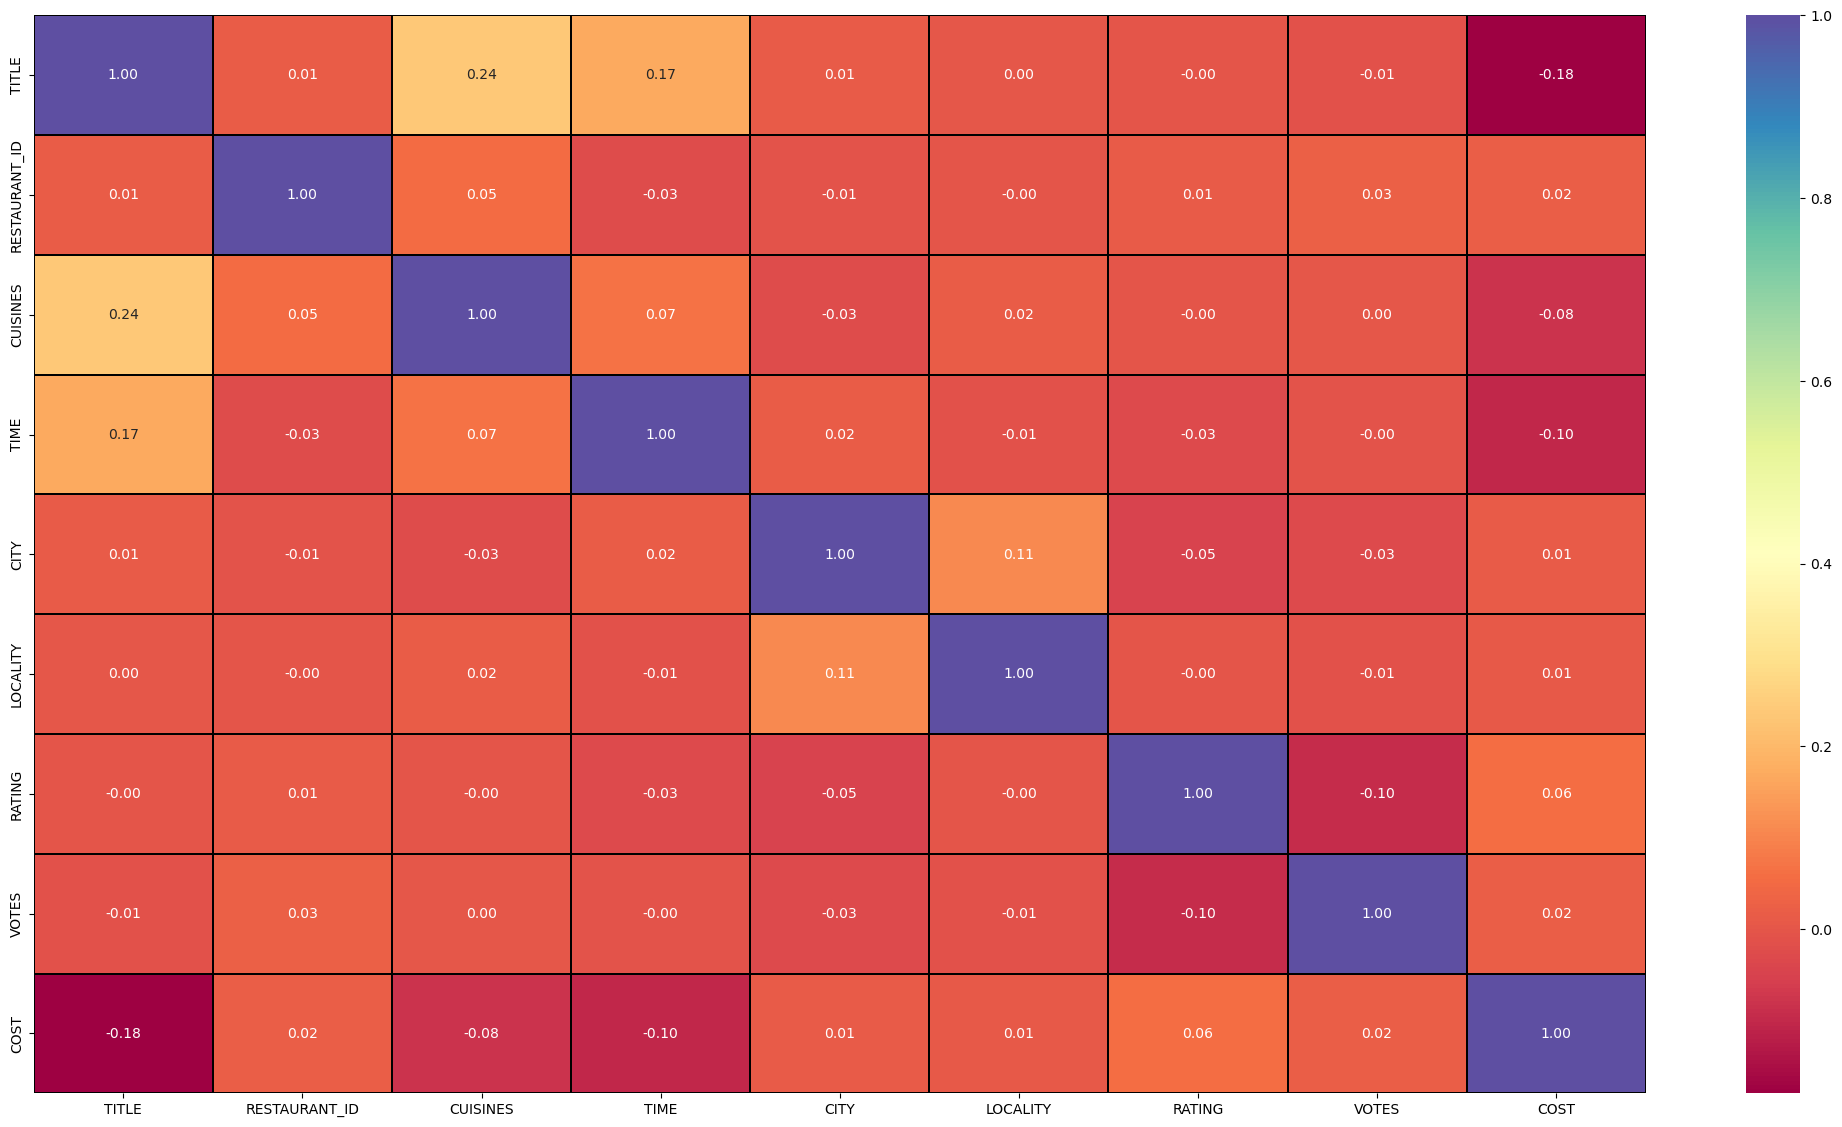

In [58]:
plt.figure(figsize=(26,14))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
# heat map for new dataset

In [59]:
df.corr()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.003132,0.243152,0.055095,-0.012840,0.026177,-0.033872,0.009337,-0.363496
RESTAURANT_ID,0.003132,1.000000,0.056239,0.008157,0.005112,-0.004242,0.032441,0.010838,0.045113
CUISINES,0.243152,0.056239,1.000000,0.104741,0.023931,0.016504,-0.038163,-0.001907,-0.036974
TIME,0.055095,0.008157,0.104741,1.000000,-0.011372,-0.008062,-0.035337,0.016003,-0.029285
CITY,-0.012840,0.005112,0.023931,-0.011372,1.000000,0.043072,0.026137,0.012734,0.048066
LOCALITY,0.026177,-0.004242,0.016504,-0.008062,0.043072,1.000000,-0.023361,0.005459,-0.016484
RATING,-0.033872,0.032441,-0.038163,-0.035337,0.026137,-0.023361,1.000000,-0.010109,0.267994
VOTES,0.009337,0.010838,-0.001907,0.016003,0.012734,0.005459,-0.010109,1.000000,-0.022673
COST,-0.363496,0.045113,-0.036974,-0.029285,0.048066,-0.016484,0.267994,-0.022673,1.000000


<Axes: >

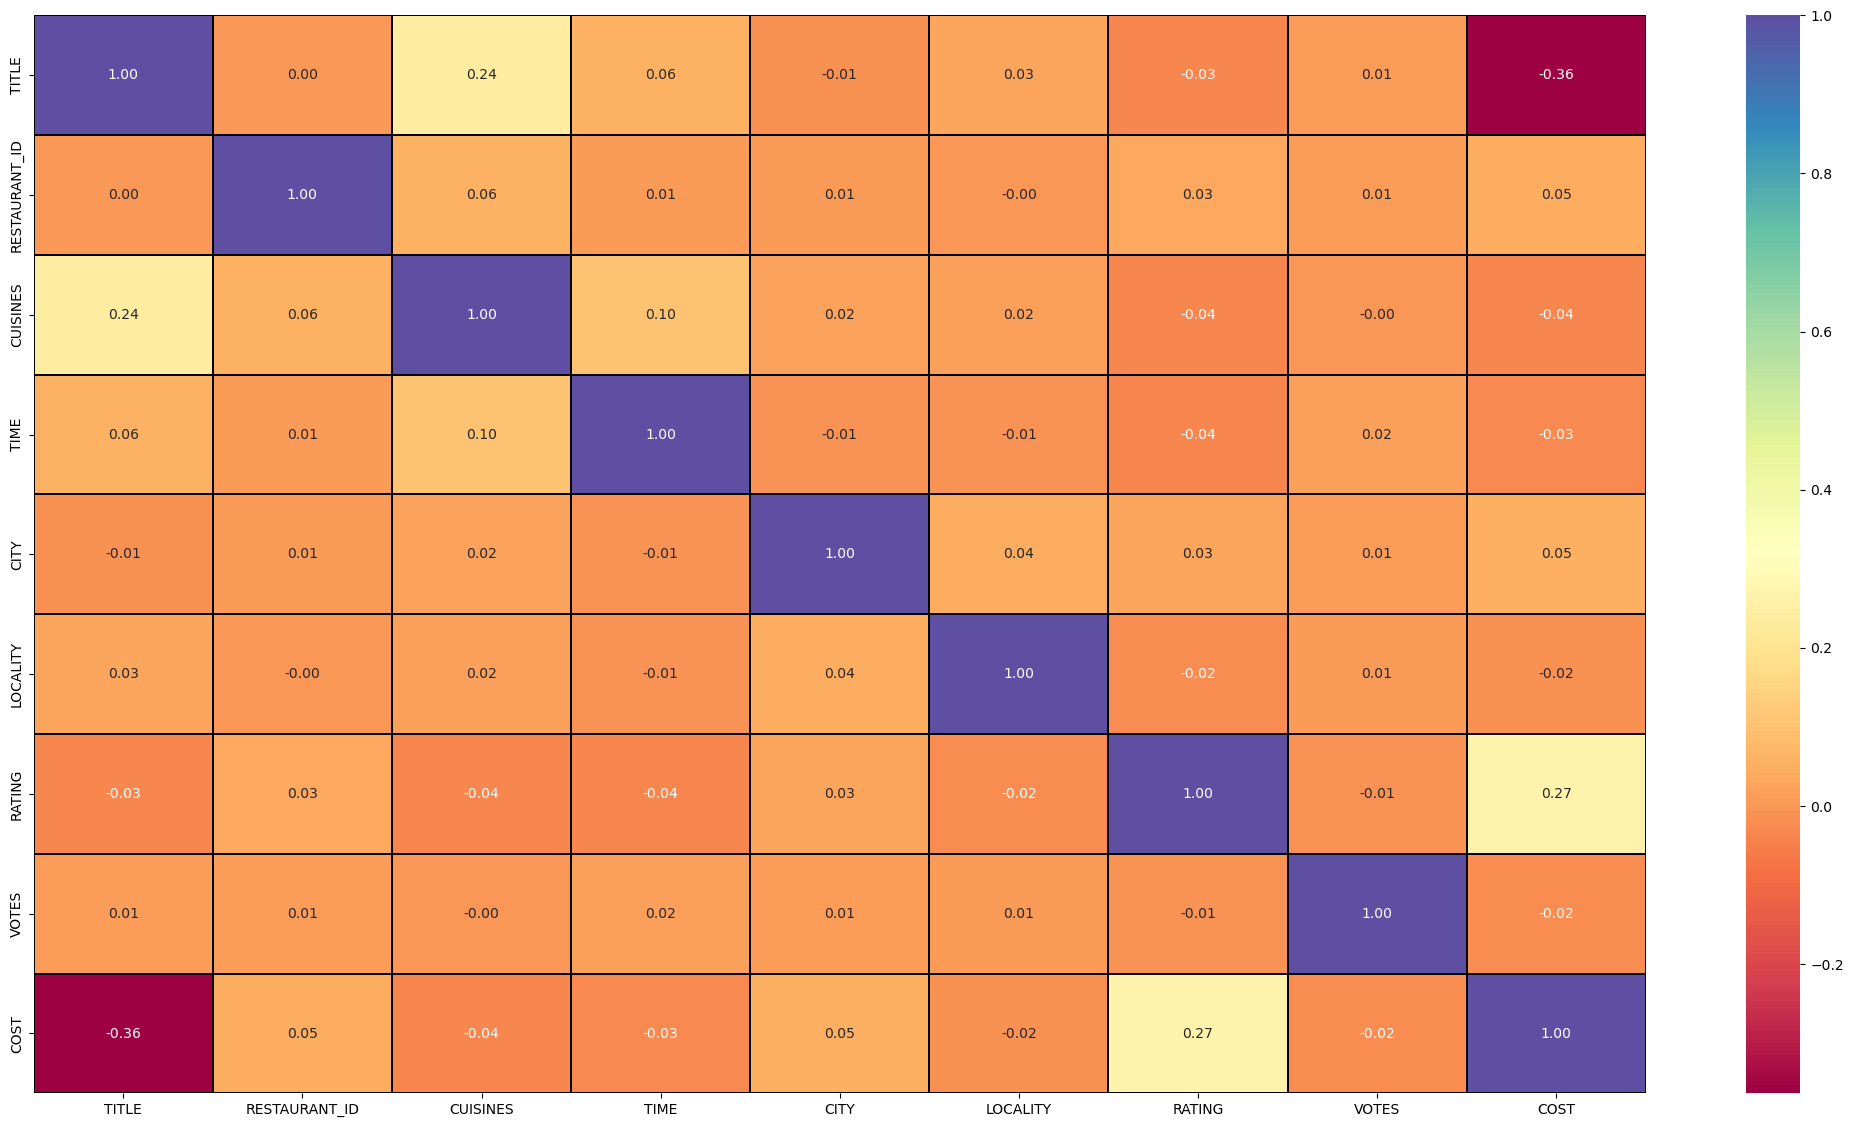

In [60]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
# heat map for old dataset

In [ ]:
# we can see that after doing data preprocessing  on the data, it has reduced correlation with other columns

In [61]:
# standard scaler is done so as to make all values from whole data on the same level/range.
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df2=pd.DataFrame(s.fit_transform(df1),columns=df1.columns)
df2

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,-0.283536,-0.998557,-1.131581,-0.500716,2.524464,0.132319,-0.595512,-0.488869,0.879783
1,-0.484690,0.679944,1.516588,0.175105,0.011997,0.257359,0.125427,-1.424638,1.602313
2,-0.283536,-0.339210,-0.536999,-0.300915,0.011997,0.519679,-1.072048,-0.516024,-0.303137
3,0.287588,-1.117182,1.429040,0.687847,0.120828,0.842967,-0.173942,-0.802352,-0.303137
4,-2.194496,1.657135,-0.999737,-0.183083,0.120828,-1.465448,-1.072048,0.407862,-0.044781
...,...,...,...,...,...,...,...,...,...
11993,0.287588,0.693336,-0.608553,-1.538148,-1.557724,-0.139540,-1.072048,-0.217811,-1.139003
11994,-0.484690,-0.887848,-1.642022,-1.622679,0.120828,0.857275,0.424796,1.473003,2.233888
11995,-2.025679,-0.241893,-1.548320,-1.520217,0.537785,1.669116,-0.473310,0.083788,1.132799
11996,-0.283536,-1.022544,0.365948,0.052150,0.011997,-1.517912,-0.296143,-1.565463,-0.638028


In [62]:
# vif factor is checked for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(df2.values,i) for i in range(len(df2.columns))]
vif['features']=df2.columns
vif

,VIF values,features
0,1.112674,TITLE
1,1.005068,RESTAURANT_ID
2,1.066445,CUISINES
3,1.036820,TIME
4,1.017643,CITY
5,1.012972,LOCALITY
6,1.016382,RATING
7,1.012006,VOTES
8,1.045136,COST


In [ ]:
# we can see that vif values for all columns are low meaning their is no or less multicollinearity
# so we don't have to remove any column fortunately

# MODEL BUILDING

In [ ]:
#splitting data into x and y

In [63]:
x=df2.iloc[:,:-1]
x

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-0.283536,-0.998557,-1.131581,-0.500716,2.524464,0.132319,-0.595512,-0.488869
1,-0.484690,0.679944,1.516588,0.175105,0.011997,0.257359,0.125427,-1.424638
2,-0.283536,-0.339210,-0.536999,-0.300915,0.011997,0.519679,-1.072048,-0.516024
3,0.287588,-1.117182,1.429040,0.687847,0.120828,0.842967,-0.173942,-0.802352
4,-2.194496,1.657135,-0.999737,-0.183083,0.120828,-1.465448,-1.072048,0.407862
...,...,...,...,...,...,...,...,...
11993,0.287588,0.693336,-0.608553,-1.538148,-1.557724,-0.139540,-1.072048,-0.217811
11994,-0.484690,-0.887848,-1.642022,-1.622679,0.120828,0.857275,0.424796,1.473003
11995,-2.025679,-0.241893,-1.548320,-1.520217,0.537785,1.669116,-0.473310,0.083788
11996,-0.283536,-1.022544,0.365948,0.052150,0.011997,-1.517912,-0.296143,-1.565463


In [64]:
y=df2.iloc[:,-1]
y

0        0.879783
1        1.602313
2       -0.303137
3       -0.303137
4       -0.044781
           ...   
11993   -1.139003
11994    2.233888
11995    1.132799
11996   -0.638028
11997   -1.050581
Name: COST, Length: 11998, dtype: float64

In [65]:
y.value_counts()

COST
-0.044781    1505
-0.638028    1292
-1.139003    1267
 0.700412     929
-1.050581     794
             ... 
-0.038224       1
-0.471599       1
 2.523519       1
-0.172965       1
 1.033205       1
Name: count, Length: 61, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [69]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import Lasso  , Ridge 

In [70]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test,predlr)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('max r2 is',maxaccu,'at random state',maxrs)

max r2 is 0.0572443273576273 at random state 174


In [82]:
x1=df.iloc[:,:-1]
x1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,31,9438,2627,739,320,285,17,1278
1,33,13198,289,1885,67,1046,23,950
2,31,10915,2976,661,67,1101,19,712
3,94,6346,4130,275,222,136,22,787
4,50,15387,1766,615,222,620,19,470
...,...,...,...,...,...,...,...,...
12685,94,13228,2934,1144,131,342,19,1349
12686,33,9686,2143,1177,222,133,24,191
12687,71,11133,2088,1137,239,1342,21,1428
12688,31,6134,3506,1837,67,631,16,996


In [81]:
y1=df.iloc[:,-1]
y1

0        1200
1        1500
2         800
3         800
4         300
         ... 
12685     500
12686    1800
12687    1300
12688     400
12689     600
Name: COST, Length: 12690, dtype: int64

In [83]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test,predlr)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('max r2 is',maxaccu,'at random state',maxrs)

max r2 is 0.15239865630592897 at random state 119


In [95]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=119)

In [96]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train_lr=lr.predict(x_train)
print(lr)
print('r2 score',r2_score(y_test,predlr))
print('r2 score on training data',r2_score(y_train,pred_train_lr))
print('mean absloute error',mean_absolute_error(y_test,predlr))
print('mean squared error',mean_squared_error(y_test,predlr))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,predlr)))

LinearRegression()
r2 score 0.15239865630592897
r2 score on training data 0.11908474738382169
mean absloute error 337.42070037778706
mean squared error 306517.6107229463
root mean squared error 553.6403261350697


In [97]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
pred_train_rfr=rfr.predict(x_train)
print(rfr)
print('r2 score',r2_score(y_test,predrfr))
print('r2 score on training data',r2_score(y_train,pred_train_rfr))
print('mean absloute error',mean_absolute_error(y_test,predrfr))
print('mean squared error',mean_squared_error(y_test,predrfr))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,predrfr)))

RandomForestRegressor()
r2 score 0.7168071380452291
r2 score on training data 0.95588475897264
mean absloute error 186.2943840294195
mean squared error 102410.87990948254
root mean squared error 320.0169994070355


In [98]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
pred_train_knn=knn.predict(x_train)
print(knn)
print('r2 score',r2_score(y_test,predknn))
print('r2 score on training data',r2_score(y_train,pred_train_knn))
print('mean absloute error',mean_absolute_error(y_test,predknn))
print('mean squared error',mean_squared_error(y_test,predknn))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,predknn)))

KNeighborsRegressor()
r2 score -0.05838525109863402
r2 score on training data 0.3109776451937587
mean absloute error 381.66866298923037
mean squared error 382743.27996847907
root mean squared error 618.6624927765373


In [99]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
pred_train_dtr=dtr.predict(x_train)
print(dtr)
print('r2 score',r2_score(y_test,preddtr))
print('r2 score on training data',r2_score(y_train,pred_train_dtr))
print('mean absloute error',mean_absolute_error(y_test,preddtr))
print('mean squared error',mean_squared_error(y_test,preddtr))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,preddtr)))

DecisionTreeRegressor()
r2 score 0.44986273948949007
r2 score on training data 1.0
mean absloute error 258.0879957972157
mean squared error 198945.83687943264
root mean squared error 446.03344816216713


In [100]:
l=Lasso()
l.fit(x_train,y_train)
predl=l.predict(x_test)
pred_train_l=l.predict(x_train)
print(l)
print('r2 score',r2_score(y_test,predl))
print('r2 score on training data',r2_score(y_train,pred_train_l))
print('mean absloute error',mean_absolute_error(y_test,predl))
print('mean squared error',mean_squared_error(y_test,predl))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,predl)))

Lasso()
r2 score 0.15237628305271167
r2 score on training data 0.11908468193100907
mean absloute error 337.41213710518525
mean squared error 306525.70155028073
root mean squared error 553.647633021474


In [101]:
r=Ridge()
r.fit(x_train,y_train)
predr=r.predict(x_test)
pred_train_r=r.predict(x_train)
print(r)
print('r2 score',r2_score(y_test,predr))
print('r2 score on training data',r2_score(y_train,pred_train_r))
print('mean absloute error',mean_absolute_error(y_test,predr))
print('mean squared error',mean_squared_error(y_test,predr))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,predr)))

Ridge()
r2 score 0.15239860277702888
r2 score on training data 0.11908474738343144
mean absloute error 337.42067870035186
mean squared error 306517.63008057314
root mean squared error 553.6403436172017


In [102]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
lrscore=cvs(lr,x1,y1,scoring='r2')
print(lrscore)
print(lrscore.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y_test,predlr)-lrscore.mean())*100)

[0.10992824 0.11765182 0.14802167 0.1261384  0.14217153]
0.1287823309014391
difference b/w r2 score and cross validation score 2.361632540448988


In [107]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
rfrscore=cvs(rfr,x1,y1,scoring='r2')
print(rfrscore)
print(rfrscore.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y_test,predrfr)-rfrscore.mean())*100)

[0.64811732 0.70598537 0.73998797 0.70276987 0.7544787 ]
0.7102678463708239
difference b/w r2 score and cross validation score 0.6539291674405256


In [108]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
knnscore=cvs(knn,x1,y1,scoring='r2')
print(knnscore)
print(knnscore.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y_test,predknn)-knnscore.mean())*100)

[-0.0332036  -0.05353499 -0.07137268 -0.04906284 -0.00934754]
-0.04330432797438557
difference b/w r2 score and cross validation score -1.5080923124248449


In [109]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
dtrscore=cvs(dtr,x1,y1,scoring='r2')
print(dtrscore)
print(dtrscore.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y_test,preddtr)-dtrscore.mean())*100)

[0.51291054 0.30224977 0.29921131 0.41755907 0.50264063]
0.4069142653747604
difference b/w r2 score and cross validation score 4.2948474114729684


In [110]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
lscore=cvs(l,x1,y1,scoring='r2')
print(lscore)
print(lscore.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y_test,predl)-lscore.mean())*100)

[0.10992348 0.11764837 0.1480367  0.12614002 0.1421682 ]
0.1287833554976593
difference b/w r2 score and cross validation score 2.359292755505238


In [111]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
rscore=cvs(r,x1,y1,scoring='r2')
print(rscore)
print(rscore.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y_test,predr)-rscore.mean())*100)

[0.10992822 0.11765181 0.14802171 0.1261384  0.14217152]
0.128782333579254
difference b/w r2 score and cross validation score 2.3616269197774873


In [ ]:
#                                      lr      rfr      knn       dtr      l       r
# r2 score(%)                        15.23    71.68    -5.83     44.98   15.23   15.23
# on training data                   11.90    95.58    31.09     100     11.90   11.90
# MAE                                337.4    186.2    381.66    258.08  337.4   337.42
# MSE                                306517.6 102410.8 382743    198945.8 306525.7 30617.6
# RMSE                               553.64   320.01   618.66    446.03  553.6   553.6
# cvs score                          12.87    71.02    -4.33     40.69   12.87   12.87
# difference b/w r2 and cvs score    2.36     0.65     -1.50     4.29    2.35    2.36

In [ ]:
# we can see from the above results that rfr is the best model for this as it's r2 score is highest and its MAE,MSE and RMSE
# are low compared to others and it's cvs score is also high and difference b/w cvs and r2 score is less
# other model can be made from dtr its r2 score is 44.98 whiich is best after rfr
# in dtr we can see that its accuracy on training data is 100% but on test data it's 44.98% so overfitting can be seen in this 
# case to some extent
# whole data has lot of errors as none of the r2 score reaches above 71%
# rfr and knn also has overgitting as the values on training data and r2 score differ mostly
# MAE , MSE and RMSE values of all model's are very high meaning there is a lot of error present in the data
# this data is build of on original data. after processed data has even lower values


# SAVING THE MODEL AND LOADING THE MODEL AND PREDICTING BASED ON THE MODEL

In [112]:
# saving the model and loading the model and preidicting based on the model
import joblib
joblib.dump(rfr,'Restaurant Food Cost prediction')

['Restaurant Food Cost prediction']

In [ ]:
# prediction on data test excel file (given in the question)

In [113]:
p=pd.read_excel('Data_Test.xlsx')
p

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [115]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
p1=pd.DataFrame()
for i in p.columns:
    p1[i]=le.fit_transform(p[i].values.reshape(-1,1))
p1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,1085,1293,503,110,662,23,823
1,74,3374,1632,933,96,221,22,871
2,23,347,1455,219,96,411,18,575
3,85,42,208,1071,41,456,18,179
4,74,3567,1637,208,78,300,16,394
...,...,...,...,...,...,...,...,...
4226,23,2415,1425,103,108,597,19,487
4227,85,313,267,262,9,237,23,722
4228,74,2291,679,1052,41,696,17,789
4229,74,1707,1541,215,78,332,0,1136


In [116]:
model=joblib.load('Restaurant Food Cost prediction')
prediction=model.predict(p1)
prediction

array([ 961. , 1645. ,  569.5, ..., 1513. , 1301.6, 1581.5])

In [ ]:
# prediction on x_test dataset

In [117]:
model=joblib.load('Restaurant Food Cost prediction')
prediction=model.predict(x_test)
prediction

array([ 626. , 1426.5,  387. , ...,  185.5,  563.5, 1019. ])

In [118]:
x_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
5777,31,11052,3124,258,37,501,17,378
2959,33,4164,1160,1182,37,573,25,1069
9898,94,8127,38,478,67,95,14,1643
4471,94,14731,3801,1841,37,747,31,1202
12315,31,11654,3443,2288,37,675,22,465
...,...,...,...,...,...,...,...,...
12612,94,6543,2045,555,131,413,23,1662
814,94,6370,542,1764,304,899,14,950
4262,94,5704,4004,555,67,1352,19,257
2108,31,10228,3934,555,67,713,16,1707
